In [2]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config InlineBackend.figure_format='retina'

import scipy.stats as stats
from scipy.special import inv_boxcox


# Suppress Scientific Notation in Numpy
np.set_printoptions(suppress=True)

# Suppress Scientific Notation in Pandas
pd.set_option('display.float_format', '{:.2f}'.format)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [3]:
import sklearn

print(sklearn.__version__)

# For some of the code below, make sure you have sklearn version 1.1 or above.

1.2.0


In [4]:
pr_df=pd.read_csv(r"C:\Data\insurance.csv")

In [5]:
pr_df.head()

pr_df.describe()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


In [6]:
pr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## EDA on this DataSet

In [7]:
# check for duplicates
pr_df.duplicated().value_counts()

False    1337
True        1
dtype: int64

In [8]:
pr_df[pr_df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.56


In [9]:
pr_df.drop_duplicates(keep='first',inplace=True)
pr_df.reset_index(inplace=True)
pr_df.drop(['index'],axis=1,inplace=True)

In [10]:
pr_df.duplicated().value_counts()

False    1337
dtype: int64

In [11]:
# Missing or Null values
pr_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
# Outliers
pr_df.skew()

age        0.05
bmi        0.28
children   0.94
charges    1.52
dtype: float64

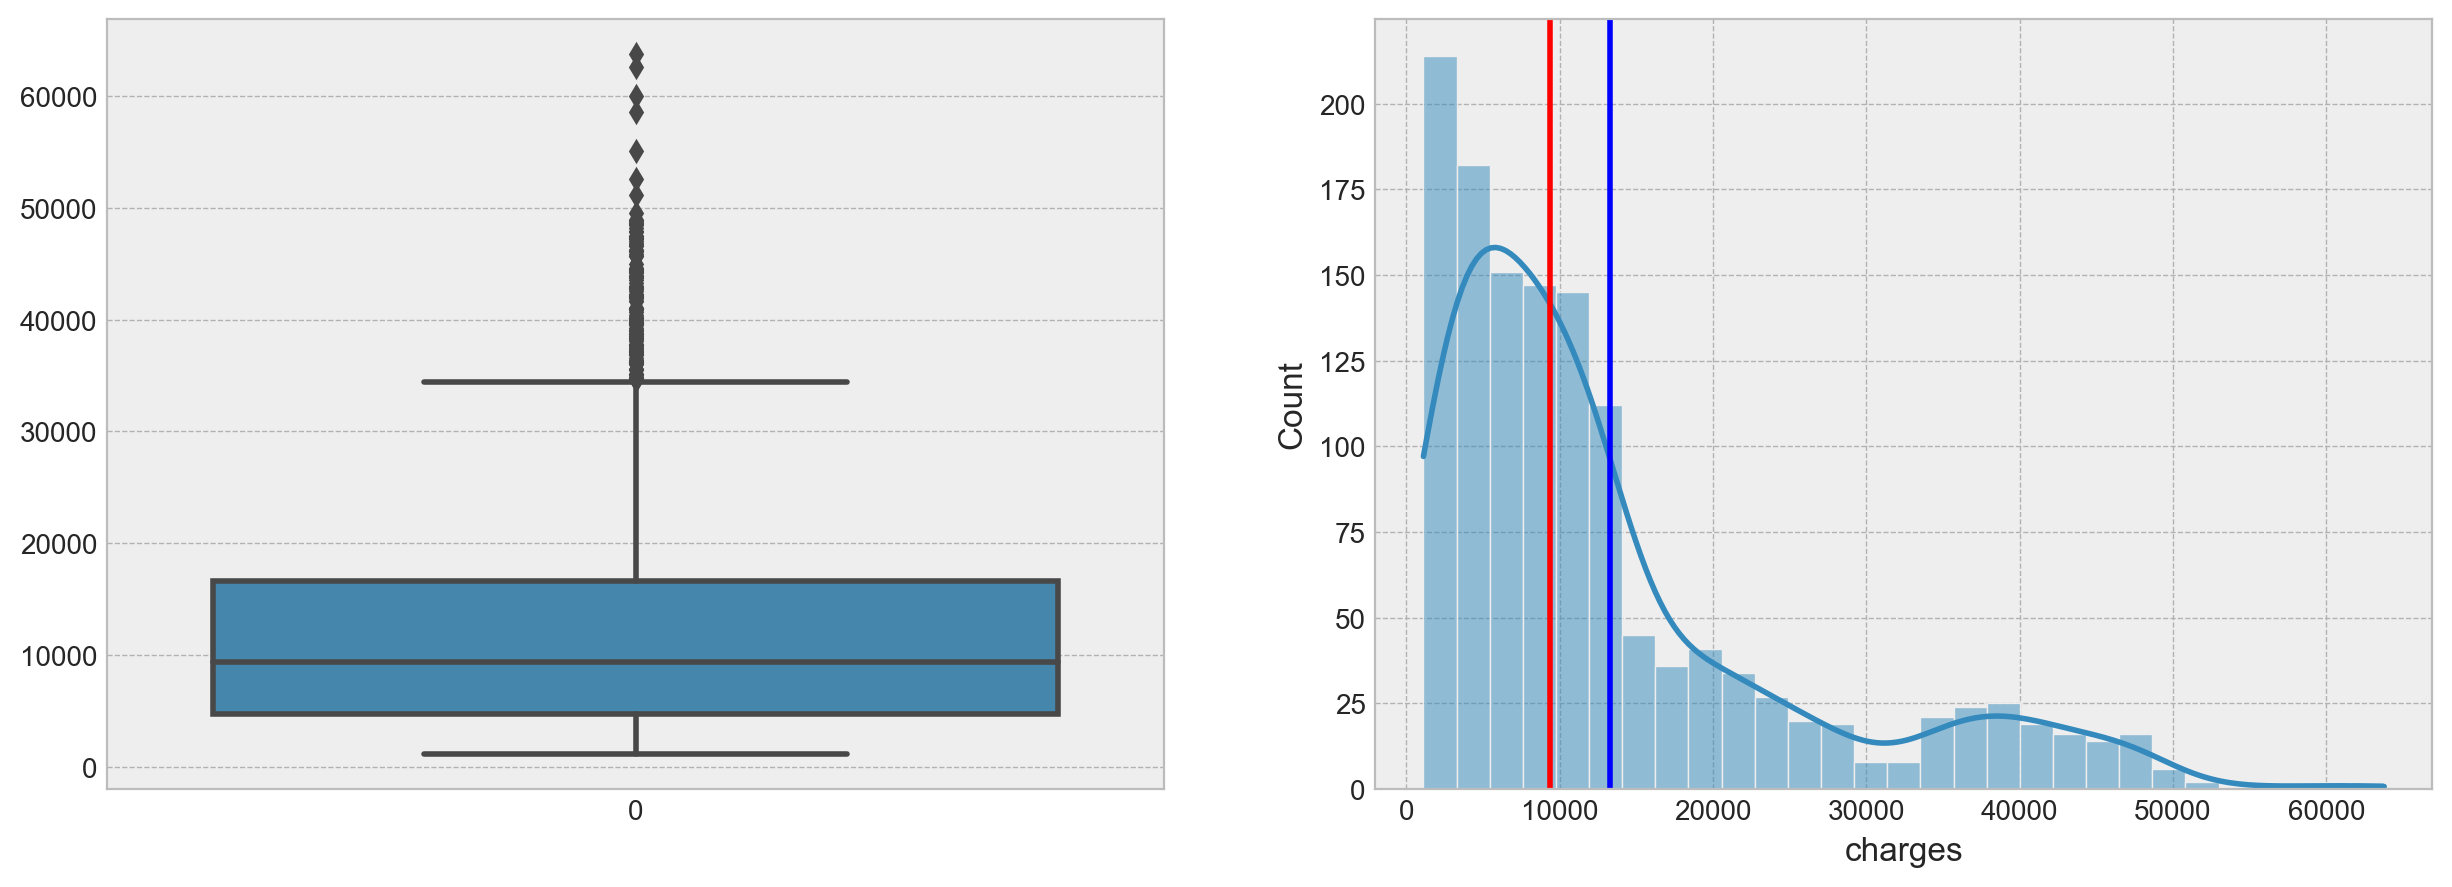

In [13]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(pr_df.charges)

plt.subplot(122)
sns.histplot(pr_df.charges.astype(float), kde = True)
plt.axvline(pr_df.charges.astype(float).mean(), color = 'blue')
plt.axvline(pr_df.charges.astype(float).median(), color = 'red');

In [14]:
#charge_med = pr_df.charges.median()

In [15]:
#pr_df.charges =pr_df.charges.fillna(charge_med)

In [16]:
# Box Plot method
Q1, Q2, Q3 = tuple(pr_df.charges.quantile(q = [0.25,0.5,0.75]).values)

In [17]:
IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1-1.5*IQR
print(IQR, UL, LL)

11911.37345 34524.777625 -13120.716174999998


In [18]:
 # Z-Score Method
zscore_arr = stats.zscore(pr_df.charges)

In [19]:
np.where(zscore_arr>2,1,0).sum()
np.where(zscore_arr<-2,1,0).sum()


107

0

In [20]:
pr_df[zscore_arr>2].index

Int64Index([  14,   23,   29,   34,   38,   39,   49,   53,   55,   84,
            ...
            1229, 1239, 1240, 1248, 1283, 1287, 1299, 1300, 1302, 1322],
           dtype='int64', length=107)

In [21]:
outlist = pr_df[(pr_df.charges > UL) | (pr_df.charges < LL)].index.tolist()

In [22]:
pr_df[(pr_df.charges > UL) | (pr_df.charges < LL)]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.13,0,yes,southeast,39611.76
19,30,male,35.30,0,yes,southwest,36837.47
23,34,female,31.92,1,yes,northeast,37701.88
29,31,male,36.30,2,yes,southwest,38711.00
30,22,male,35.60,0,yes,southwest,35585.58
...,...,...,...,...,...,...,...
1299,45,male,30.36,0,yes,southeast,62592.87
1300,62,male,30.88,3,yes,northwest,46718.16
1302,43,male,27.80,0,yes,southwest,37829.72
1312,19,female,34.70,2,yes,southwest,36397.58


In [23]:
pr_df=pr_df.drop(outlist, axis = 0).reset_index()

In [24]:
pr_df.shape

(1198, 8)

## Data Preprocessing

In [25]:
X = pr_df[['age','sex','bmi','children','smoker','region']]
y = pr_df['charges']

In [26]:
X.head()
y.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.90,0,yes,southwest
1,18,male,33.77,1,no,southeast
2,28,male,33.00,3,no,southeast
3,33,male,22.70,0,no,northwest
4,32,male,28.88,0,no,northwest


0   16884.92
1    1725.55
2    4449.46
3   21984.47
4    3866.86
Name: charges, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(898, 6) (898,)
(300, 6) (300,)


## Seperating Categorical and numerical

In [28]:
X_train.head()

,age,sex,bmi,children,smoker,region
560,33,male,42.46,1,no,southeast
945,55,male,27.64,0,no,northwest
587,52,female,25.30,2,yes,southeast
784,33,male,33.44,5,no,southeast
1048,56,female,41.91,0,no,southeast


In [29]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,sex,smoker,region
560,male,no,southeast
945,male,no,northwest
587,female,yes,southeast
784,male,no,southeast
1048,female,no,southeast


In [30]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,age,bmi,children
560,33,42.46,1
945,55,27.64,0
587,52,25.30,2
784,33,33.44,5
1048,56,41.91,0


### Scaling the Numerical features

In [31]:
X_train_num.head()

,age,bmi,children
560,33,42.46,1
945,55,27.64,0
587,52,25.30,2
784,33,33.44,5
1048,56,41.91,0


In [32]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,age,bmi,children
560,-0.41,2.04,-0.08
945,1.16,-0.40,-0.91
587,0.95,-0.78,0.75
784,-0.41,0.56,3.25
1048,1.23,1.95,-0.91


In [33]:
X_train_num.describe()

,age,bmi,children
count,898.00,898.00,898.00
mean,38.75,30.06,1.10
std,14.02,6.09,1.20
min,18.00,15.96,0.00
25%,26.00,25.80,0.00
50%,39.00,29.64,1.00
75%,51.00,33.82,2.00
max,64.00,53.13,5.00


In [34]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 3
Mean of each column: [38.74832962 30.0570657   1.09799555]
Std of each column: [14.0109376   6.08977865  1.20197332]


### Applying OneHotEncoding on Categorical Columns

In [35]:
X_train_cat['sex'].value_counts(normalize=True)

male     0.50
female   0.50
Name: sex, dtype: float64

In [36]:
X_train_cat['smoker'].value_counts(normalize=True)

no    0.88
yes   0.12
Name: smoker, dtype: float64

In [37]:
X_train_cat['region'].value_counts(normalize=True)

southeast   0.26
northwest   0.26
northeast   0.25
southwest   0.23
Name: region, dtype: float64

In [38]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
560,1.00,0.00,0.00,1.00,0.00
945,1.00,0.00,1.00,0.00,0.00
587,0.00,1.00,0.00,1.00,0.00
784,1.00,0.00,0.00,1.00,0.00
1048,0.00,0.00,0.00,1.00,0.00


### Concatinating the Encoded Categorical Features and Rescaled Numerical Features

In [39]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_ohe], axis=1)

X_train_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
560,-0.41,2.04,-0.08,1.00,0.00,0.00,1.00,0.00
945,1.16,-0.40,-0.91,1.00,0.00,1.00,0.00,0.00
587,0.95,-0.78,0.75,0.00,1.00,0.00,1.00,0.00
784,-0.41,0.56,3.25,1.00,0.00,0.00,1.00,0.00
1048,1.23,1.95,-0.91,0.00,0.00,0.00,1.00,0.00


### Preparing Test Data

In [40]:
X_test.head()

,age,sex,bmi,children,smoker,region
413,19,male,25.18,0,no,northwest
157,46,female,28.90,2,no,southwest
267,57,female,38.00,2,no,southwest
299,63,male,36.77,0,no,northeast
347,46,female,32.30,2,no,northeast


In [41]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 413 to 107
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       300 non-null    int64  
 1   sex       300 non-null    object 
 2   bmi       300 non-null    float64
 3   children  300 non-null    int64  
 4   smoker    300 non-null    object 
 5   region    300 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 16.4+ KB


In [42]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()


X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,sex,smoker,region
413,male,no,northwest
157,female,no,southwest
267,female,no,southwest
299,male,no,northeast
347,female,no,northeast


,age,bmi,children
413,19,25.18,0
157,46,28.90,2
267,57,38.00,2
299,63,36.77,0
347,46,32.30,2


In [43]:

X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat), 
                               columns=encoder.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
413,1.00,0.00,1.00,0.00,0.00
157,0.00,0.00,0.00,0.00,1.00
267,0.00,0.00,0.00,0.00,1.00
299,1.00,0.00,0.00,0.00,0.00
347,0.00,0.00,0.00,0.00,0.00


In [44]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,age,bmi,children
413,-1.41,-0.80,-0.91
157,0.52,-0.19,0.75
267,1.30,1.30,0.75
299,1.73,1.10,-0.91
347,0.52,0.37,0.75


In [45]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe], axis=1)

X_test_transformed.head()


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
413,-1.41,-0.80,-0.91,1.00,0.00,1.00,0.00,0.00
157,0.52,-0.19,0.75,0.00,0.00,0.00,0.00,1.00
267,1.30,1.30,0.75,0.00,0.00,0.00,0.00,1.00
299,1.73,1.10,-0.91,1.00,0.00,0.00,0.00,0.00
347,0.52,0.37,0.75,0.00,0.00,0.00,0.00,0.00


## Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

In [47]:
y_test_pred = regressor.predict(X_test_transformed)

In [48]:
medical_LR = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

medical_LR.head()

,Actual,Predicted
413,1632.04,2766.65
157,8823.28,9939.26
267,12646.21,13331.11
299,13981.85,14840.67
347,9411.00,11638.12


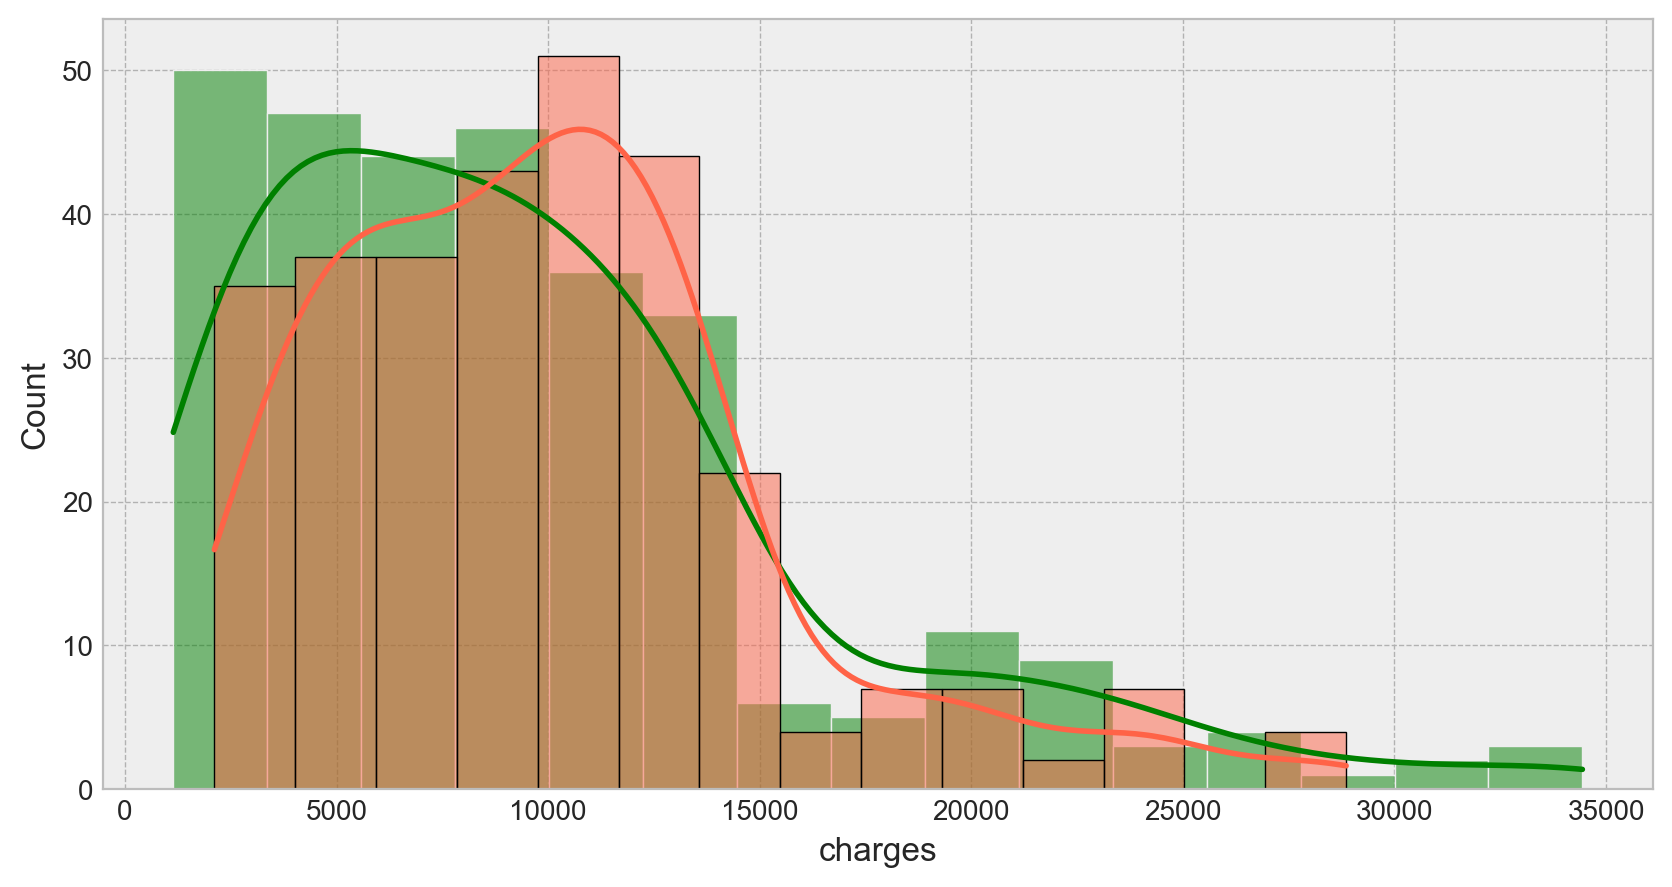

In [49]:
plt.figure(figsize=(10,5), dpi = 100)
sns.histplot(y_test, color='green', kde = True);
sns.histplot(y_test_pred, color='tomato', kde = True, ec='black');

In [50]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  2278.5522716192195
Mean Squared Error:  15602151.69138225
Root Mean Squared Error:  3949.9559100554843


## KNN Regression

In [51]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [52]:
y_test_pred = regressor.predict(X_test_transformed)

In [53]:
medical_KNN = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

medical_KNN.head()

,Actual,Predicted
413,1632.04,1913.84
157,8823.28,9337.84
267,12646.21,12740.00
299,13981.85,12836.74
347,9411.00,16739.00


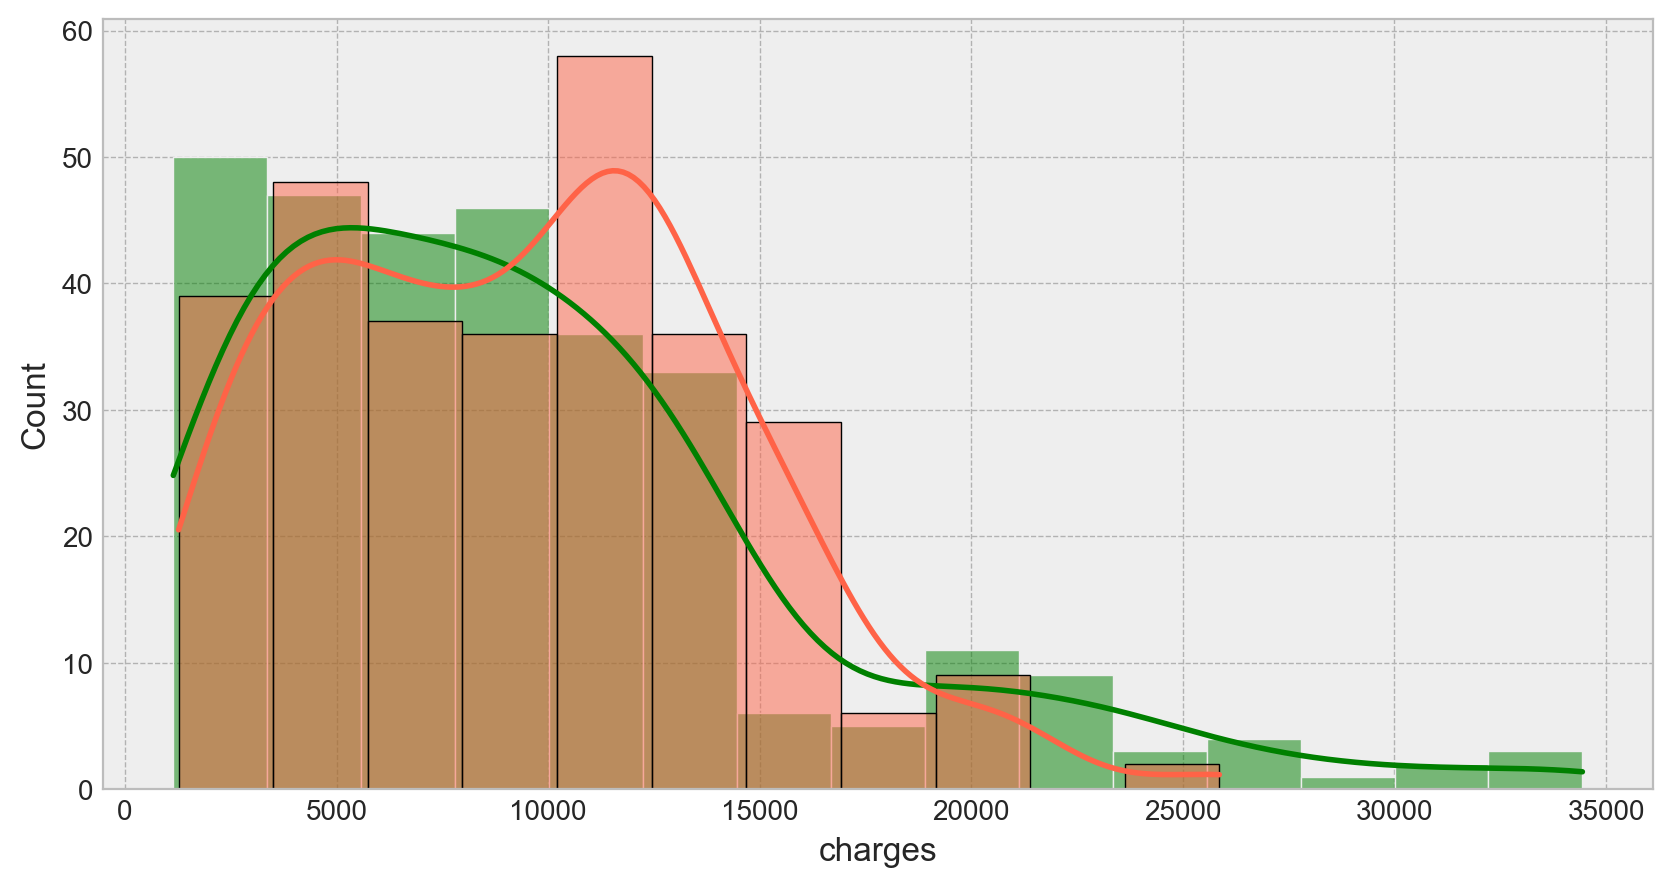

In [54]:
plt.figure(figsize=(10,5), dpi = 100)
sns.histplot(y_test, color='green', kde = True);
sns.histplot(y_test_pred, color='tomato', kde = True, ec='black');

In [55]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  2802.1328680593333
Mean Squared Error:  23193972.092838313
Root Mean Squared Error:  4816.012052812816


## Decision Tree Regression

In [56]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [57]:
y_test_pred = regressor.predict(X_test_transformed)

In [58]:
medical_DT = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

medical_DT.head()

,Actual,Predicted
413,1632.04,1628.47
157,8823.28,8825.09
267,12646.21,12363.55
299,13981.85,13822.80
347,9411.00,8825.09


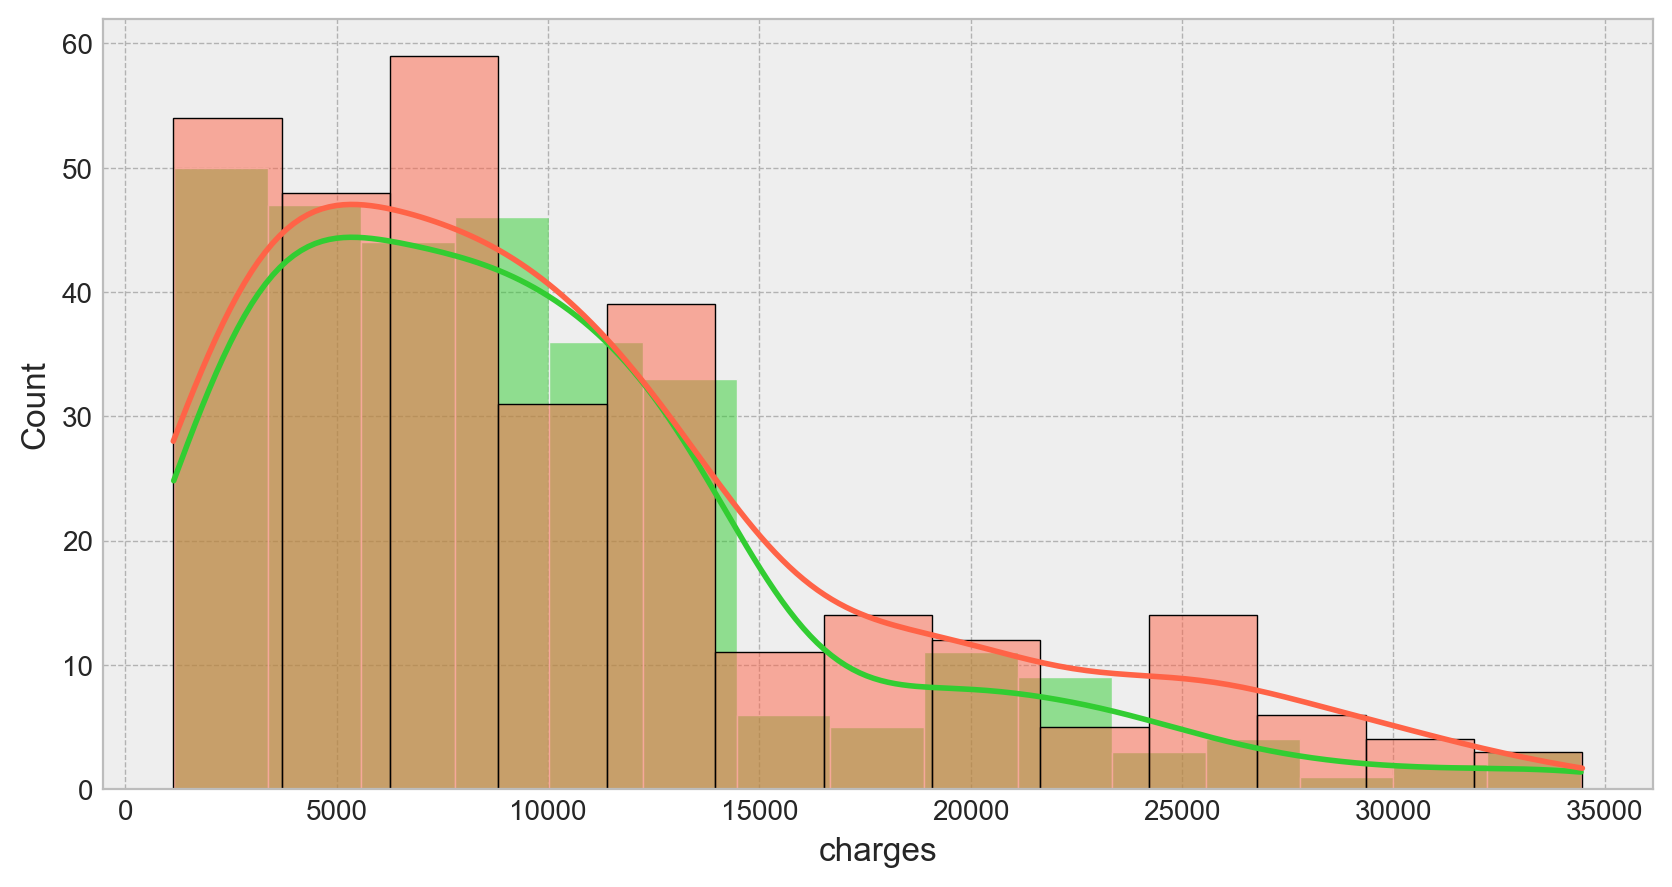

In [59]:
plt.figure(figsize=(10,5), dpi = 100)
sns.histplot(y_test, color='limegreen', kde = True);
sns.histplot(y_test_pred, color='tomato', kde = True,ec='black');

In [60]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  3038.037519066667
Mean Squared Error:  42776027.174802
Root Mean Squared Error:  6540.338460263505


## Random Forest Regression

In [61]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [62]:
y_test_pred = regressor.predict(X_test_transformed)

In [63]:
medical_RF = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

medical_RF.head()

,Actual,Predicted
413,1632.04,1664.74
157,8823.28,9434.61
267,12646.21,14671.92
299,13981.85,14728.06
347,9411.00,9537.81


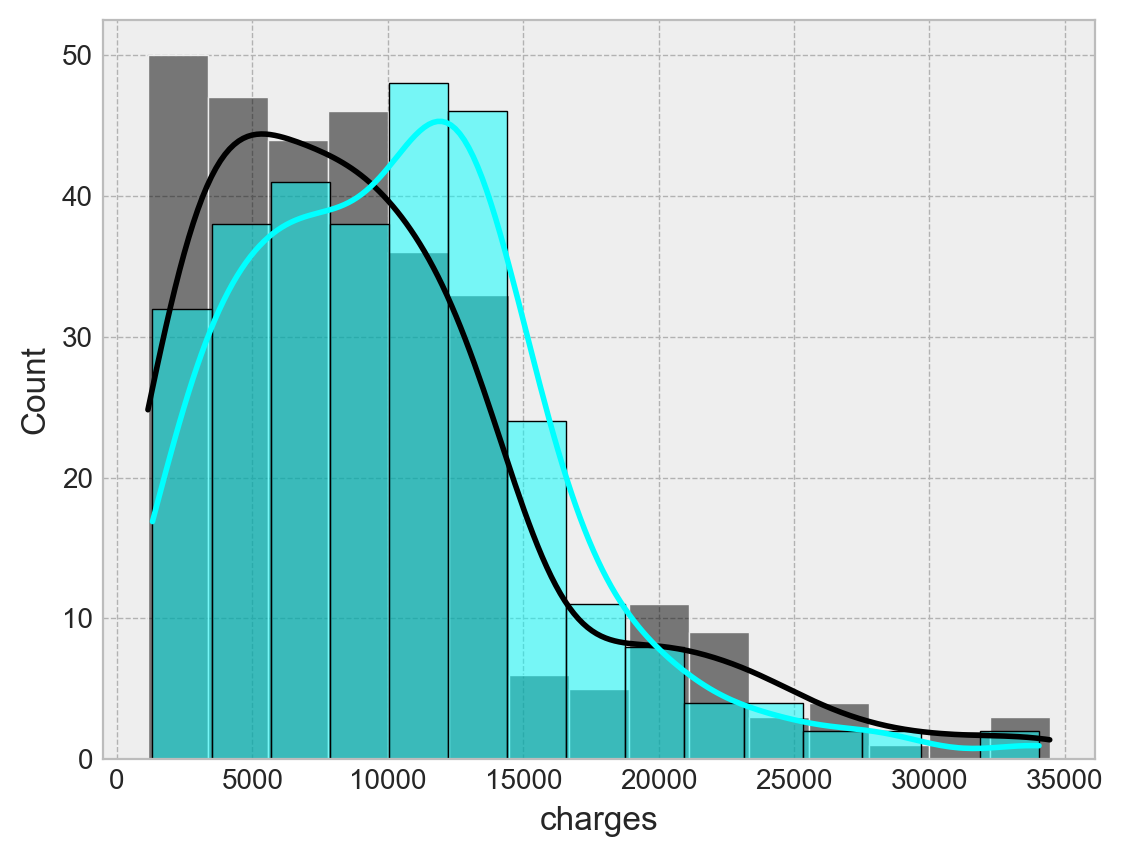

In [64]:
sns.histplot(y_test, color='black', kde = True);
sns.histplot(y_test_pred, color='cyan', kde = True,ec='black');

In [65]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  2513.726857828601
Mean Squared Error:  18498156.85234865
Root Mean Squared Error:  4300.948366622023


## GB Boosting Regressor

In [66]:
from sklearn.ensemble import GradientBoostingRegressor
GBregressor = GradientBoostingRegressor()
GBregressor.fit(X_train_transformed, y_train)

GradientBoostingRegressor()

In [67]:
y_test_pred = GBregressor.predict(X_test_transformed)

In [68]:
medical_GB = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

medical_GB.head()

,Actual,Predicted
413,1632.04,2059.86
157,8823.28,9408.82
267,12646.21,14526.94
299,13981.85,19082.18
347,9411.00,10448.91


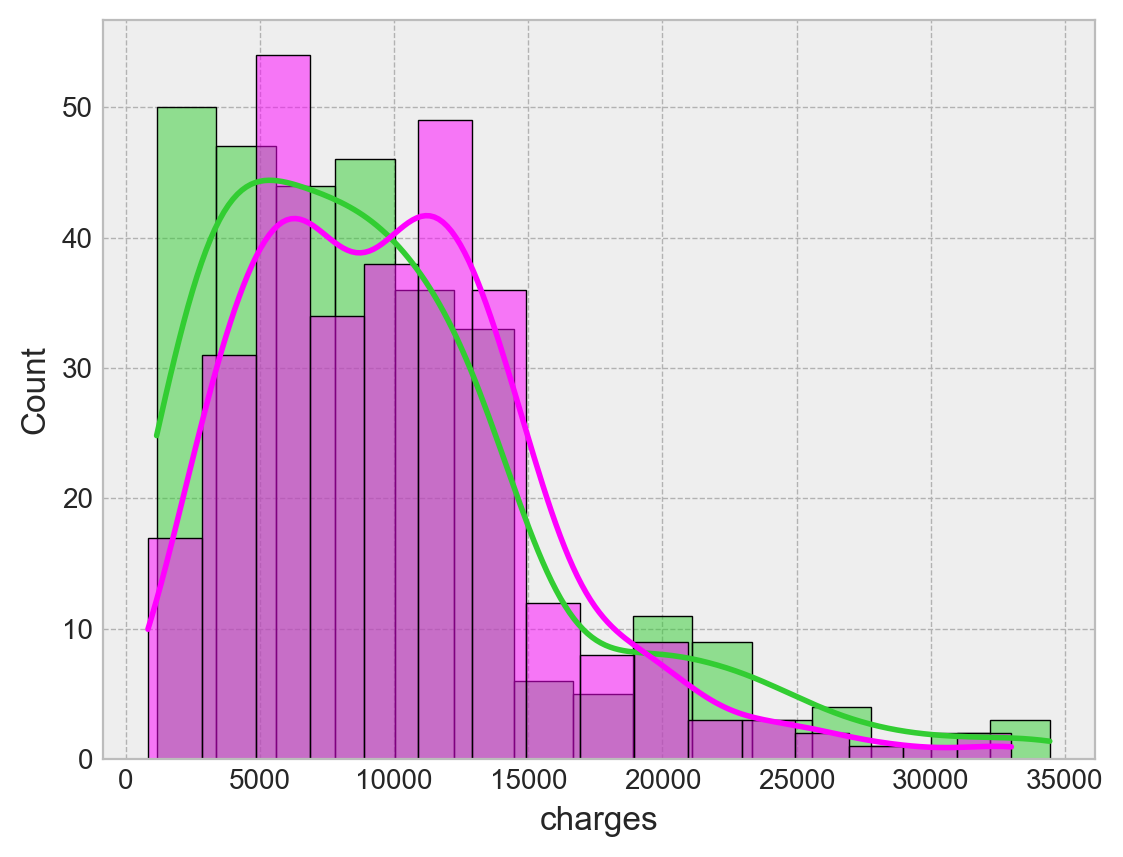

In [69]:
sns.histplot(y_test, color='limegreen', kde = True,ec='black');
sns.histplot(y_test_pred, color='magenta', kde = True,ec='black');

In [70]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  2228.18303570586
Mean Squared Error:  14758794.48628206
Root Mean Squared Error:  3841.717647912462


In [71]:
Medical = {"Algorithm": ["Linear Regression", " KNN Regression", " DT Regression", "Random Forest Regressor", "Gradient-Boosting Regressor"],
           "Regression": ["Simple", "K-Nearest", "Decision-Tree", "Ensemble", "Boosting"],
           "Mean Absolute Error": [2278.5522716192195,2802.1328680593333 , 3078.2918174333336, 2508.623215863534, 2229.322561467851],
           "Ranking": [2,4,5,3,1]}

In [72]:
Final_Predict = pd.DataFrame(Medical)

In [73]:
Final_Predict

,Algorithm,Regression,Mean Absolute Error,Ranking
0,Linear Regression,Simple,2278.55,2
1,KNN Regression,K-Nearest,2802.13,4
2,DT Regression,Decision-Tree,3078.29,5
3,Random Forest Regressor,Ensemble,2508.62,3
4,Gradient-Boosting Regressor,Boosting,2229.32,1


> We consider that ***`Random Forest Regression`*** is best algorithm for this Medical Cost Prediction Problem